In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pensions.csv', index_col=0, parse_dates=True, na_values=-9999.99)

In [3]:
df.head()

,Total,by age,disability,in case of loss of breadwinner,for years of seniority,social,financial support of retired judges,military
202201,10841.117,8134.917,1355.000,524.000,208.000,68.000,3.200,548.000
202110,10945.145,8229.945,1360.000,526.000,210.000,68.000,3.200,548.000
202107,10968.143,8240.443,1365.300,528.900,211.300,69.500,3.300,549.400
202104,11052.849,8316.443,1367.192,530.902,212.345,71.924,3.556,550.487
202101,11130.954,8330.485,1426.553,531.849,214.304,72.843,3.538,551.382


In [4]:
print(df['disability'].size)

38


In [5]:
df.index = pd.to_datetime(df.index, format = "%Y%m").to_period('M')
df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 38 entries, 2010-01 to 2022-01
Freq: M
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Total                                38 non-null     float64
 1   by age                               38 non-null     float64
 2   disability                           38 non-null     float64
 3   in case of loss of breadwinner       38 non-null     float64
 4   for years of seniority               38 non-null     float64
 5   social                               38 non-null     float64
 6   financial support of retired judges  38 non-null     float64
 7   military                             38 non-null     float64
dtypes: float64(8)
memory usage: 2.7 KB


In [6]:
df["2016"]

,Total,by age,disability,in case of loss of breadwinner,for years of seniority,social,financial support of retired judges,military
2016-01,12312.459,9415.743,1371.124,624.781,236.796,101.086,1.411,561.518
2016-04,12233.970,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2016-07,11964.635,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2016-10,11956.214,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [7]:
df["2015"][['Total']]

,Total
2015-01,12147.189
2015-04,12338.593
2015-07,12251.570
2015-10,12275.138


In [8]:
df = df.copy()
df.columns

Index(['Total', 'by age', 'disability', 'in case of loss of breadwinner',
       'for years of seniority', 'social',
       'financial support of retired judges', 'military'],
      dtype='object')

In [9]:
df.columns = ['total', 'by_age', 'disability',
       'loss_of_breadwinner', 'for_years_of_seniority', 'social',
       'retired_judges', 'military']

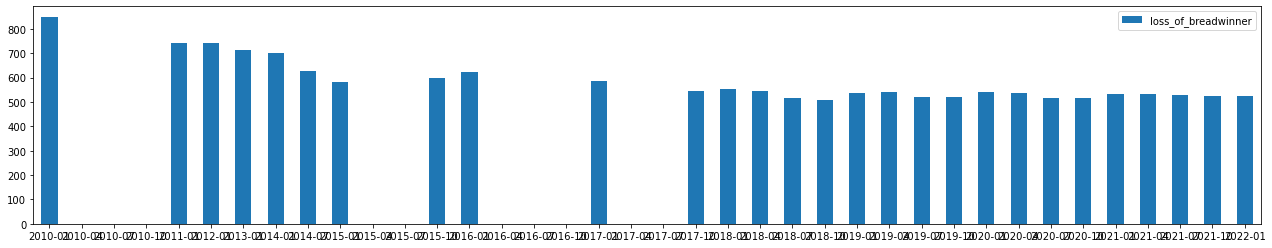

In [10]:
ax = df[['loss_of_breadwinner']].plot.bar(rot=0, figsize = (22,4))
#ax.invert_xaxis()

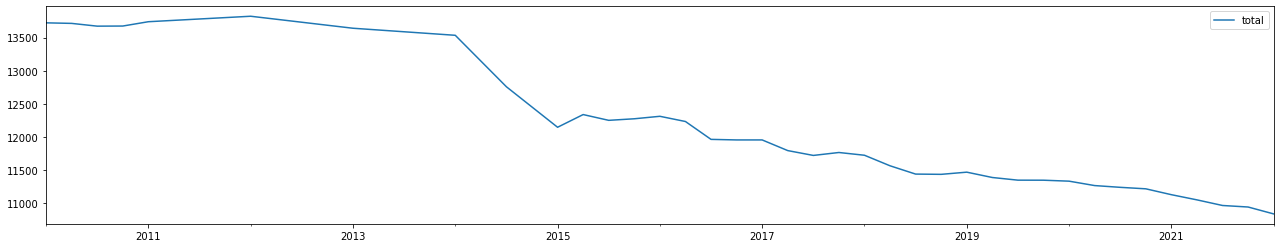

In [11]:
ax = df[['total']].plot(rot=0, figsize = (22,4))

In [12]:
def difference(category, df):
    df['difference_' + category] = df[category].shift(-1) - df[category]
    return df 

for category in df.columns:
    df = difference(category, df)
    
df = df[:-1]
print(df[['difference_total', 'difference_by_age', 'difference_disability']])

         difference_total  difference_by_age  difference_disability
2010-01            -8.296         -10569.391              -1499.550
2010-04           -41.654              0.000                  0.000
2010-07             1.703              0.000                  0.000
2010-10            65.099          10587.451               1452.032
2011-01            82.541             39.705                 34.994
2012-01          -180.800           -125.744                 -9.974
2013-01          -106.392           -104.559                 20.456
2014-01          -775.865           -565.653                -73.073
2014-07          -610.254           -490.605                -64.738
2015-01           191.404          -9340.595              -1359.697
2015-04           -87.023              0.000                  0.000
2015-07            23.568           9418.475               1362.508
2015-10            37.321             -2.732                  8.616
2016-01           -78.489          -9415.743    

In [13]:
df.difference_total[0:2].sum()

-49.95000000000073

In [14]:
df.difference_by_age['2016':'2016'].sum()

-300.1399999999994

In [15]:
def cum_year(df, categoris_list, year):
    sum_year = df[str(year):str(year)][categoris_list].sum()
    return sum_year 

years_index = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
sum_year = pd.DataFrame([])

for year in years_index:
    data = cum_year(df,['difference_by_age', 'difference_disability', 'difference_total'], year)
    sum_year = sum_year.append(data, ignore_index=True)
    
sum_year.index = years_index
sum_year.index = pd.to_datetime(sum_year.index, format='%Y').to_period('Y')
print(sum_year)

      difference_by_age  difference_disability  difference_total
2010             18.060                -47.518            16.852
2011             39.705                 34.994            82.541
2012           -125.744                 -9.974          -180.800
2013           -104.559                 20.456          -106.392
2014          -1056.258               -137.811         -1386.119
2015             75.148                 11.427           165.270
2016           -300.140                -13.831          -356.261
2017           -193.062                  3.664          -230.828
2018           -229.528                  9.292          -254.965
2019           -158.455                 35.455          -135.675
2020           -204.073                 20.849          -203.776
2021           -195.568                -71.553          -289.837


In [16]:
#df = pd.DataFrame({'sum_year_difference_total': sum_year_difference_total, 
#                   'sum_year_difference_age': sum_year_difference_age,
#                   'years_index' : years_index})

#df = df.set_index(pd.to_datetime(years_index, format = "%Y").to_period('Y'))
#df = df.drop(['years_index'], axis=1)
#print(df)

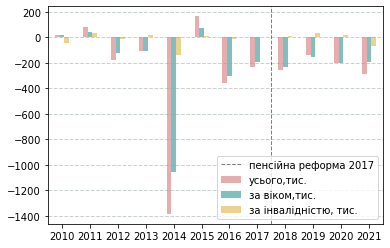

In [17]:
data_plot = sum_year['2010':][['difference_total', 'difference_by_age',
                               'difference_disability']]
data_plot.plot.bar(legend=True, alpha=0.5, color=['indianred', 'teal','goldenrod']);
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
xc = 7.5
plt.axvline(x=xc, color='k', linestyle='--', linewidth=1, alpha = 0.5 );
#plt.text(x = 2 + 0.1  , y = 150, s = 'пенсiйна реформа 2017', size = 10)
plt.legend(labels=['пенсiйна реформа 2017', 'усього,тис.','за віком,тис.', 'за iнвалiднiстю, тис.']);
plt.xticks(range(0, data_plot.shape[0]), data_plot.index, rotation=0);

In [18]:
df['2020':][['difference_total', 'difference_by_age']]

,difference_total,difference_by_age
2020-01,-66.403,-67.467
2020-04,-26.493,-17.968
2020-07,-22.438,-19.023
2020-10,-88.442,-99.615
2021-01,-78.105,-14.042
2021-04,-84.706,-76.000
2021-07,-22.998,-10.498
2021-10,-104.028,-95.028


In [19]:
print(df.columns)

Index(['total', 'by_age', 'disability', 'loss_of_breadwinner',
       'for_years_of_seniority', 'social', 'retired_judges', 'military',
       'difference_total', 'difference_by_age', 'difference_disability',
       'difference_loss_of_breadwinner', 'difference_for_years_of_seniority',
       'difference_social', 'difference_retired_judges',
       'difference_military'],
      dtype='object')


In [20]:
cols = ['difference_total', 'difference_by_age', 'difference_disability',
       'difference_loss_of_breadwinner', 'difference_for_years_of_seniority',
       'difference_social', 'difference_retired_judges',
       'difference_military']
df_2018_2021 = df['2018':][cols]
#df_2018_2021 = df_2018_2021[1:]
print(df_2018_2021[['difference_total', 'difference_by_age', 'difference_disability']])

         difference_total  difference_by_age  difference_disability
2018-01          -158.981           -131.870                 -8.018
2018-04          -125.002            -86.505                 -3.441
2018-07            -3.757              3.079                  3.645
2018-10            32.775            -14.232                 17.106
2019-01           -80.456            -78.477                 -2.354
2019-04           -40.037            -18.770                  2.121
2019-07            -0.725             -7.171                 10.305
2019-10           -14.457            -54.037                 25.383
2020-01           -66.403            -67.467                  6.028
2020-04           -26.493            -17.968                 14.306
2020-07           -22.438            -19.023                 -0.333
2020-10           -88.442            -99.615                  0.848
2021-01           -78.105            -14.042                -59.361
2021-04           -84.706            -76.000    

In [21]:
data = df_2018_2021[['difference_total', 'difference_by_age', 'difference_disability']]
data_2018 = data['2018':'2018']
data_2019 = data['2019':'2019']
data_2020 = data['2020':'2020']
data_2021 = data['2021':'2021']

# add zero values in future dates
#df2 = pd.DataFrame([ [0,0,0], [0,0,0]], columns=['difference_total', 'difference_by_age', 'difference_disability'])
#data_2021 = pd.concat([data_2021, df2])

#data_2018.reset_index(drop=True, inplace=True)
#data_2019.reset_index(drop=True, inplace=True)
#data_2020.reset_index(drop=True, inplace=True)
#data_2021.reset_index(drop=True, inplace=True)

indexes = ['I кв.', 'II кв.', 'III кв.', 'IV кв.']

data_total = pd.DataFrame({'2018':data_2018.difference_total.values,
                          '2019':data_2019.difference_total.values,
                          '2020':data_2020.difference_total.values,
                          '2021':data_2021.difference_total.values},
                         index = indexes)

data_total_by_age = pd.DataFrame({'2018':data_2018.difference_by_age.values,
                          '2019':data_2019.difference_by_age.values,
                          '2020':data_2020.difference_by_age.values,
                          '2021':data_2021.difference_by_age.values},
                         index = indexes)

data_total_difference_disability = pd.DataFrame({'2018':data_2018.difference_disability.values,
                          '2019':data_2019.difference_disability.values,
                          '2020':data_2020.difference_disability.values,
                          '2021':data_2021.difference_disability.values},
                         index = indexes)
#df = pd.concat([data_2018, data_2019])
#df = pd.DataFrame(data = data)
print(data_total_difference_disability)

           2018    2019    2020    2021
I кв.    -8.018  -2.354   6.028 -59.361
II кв.   -3.441   2.121  14.306  -1.892
III кв.   3.645  10.305  -0.333  -5.300
IV кв.   17.106  25.383   0.848  -5.000


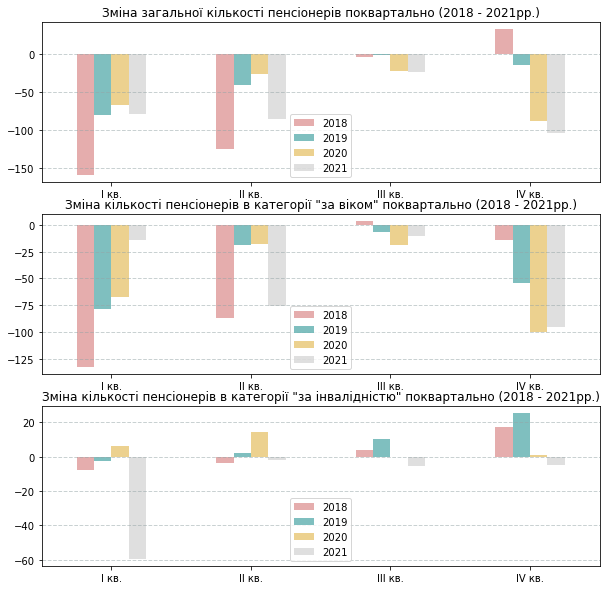

In [22]:
data_plot = data_total
n = data_plot.shape[0]
width = 0.3

X = np.arange(n)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 10));
    
data_total.plot.bar(ax=ax1, legend=True, alpha=0.5, color=["indianred",'teal','goldenrod', 'silver'])
ax1.legend(loc='lower center')
ax1.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
ax1.title.set_text('Змiна загальної кiлькостi пенсiонерiв поквартально (2018 - 2021рр.)')
ax1.set_xticklabels(labels = data_total.index, rotation=0)

data_total_by_age.plot.bar(ax=ax2, legend=True, alpha=0.5, color=["indianred",'teal','goldenrod', 'silver'])
ax2.legend(loc='lower center')
ax2.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
ax2.title.set_text('Змiна кiлькостi пенсiонерiв в категорiї "за вiком" поквартально (2018 - 2021рр.)')
ax2.set_xticklabels(labels = data_total_by_age.index, rotation=0)


data_total_difference_disability.plot.bar(ax=ax3, legend=True, alpha=0.5, color=["indianred",'teal','goldenrod', 'silver'])
ax3.legend(loc='lower center')
ax3.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
ax3.title.set_text('Змiна кiлькостi пенсiонерiв в категорiї "за iнвалiднiстю" поквартально (2018 - 2021рр.)')
ax3.set_xticklabels(labels = data_total_difference_disability.index, rotation=0)


plt.show()

In [23]:
def difference_year(category, df):
    #df['12_month_' + category] = df[category].cumsum().shift(+4).ffill()
    df['year_' + category] = df[category].rolling(min_periods=4, window=4).sum()
    return df 
for category in cols:
    df_2018_2021 = difference_year(category, df_2018_2021)
    
print(df_2018_2021[['year_difference_total', 'year_difference_by_age', 'year_difference_disability']])

         year_difference_total  year_difference_by_age  \
2018-01                    NaN                     NaN   
2018-04                    NaN                     NaN   
2018-07                    NaN                     NaN   
2018-10               -254.965                -229.528   
2019-01               -176.440                -176.135   
2019-04                -91.475                -108.400   
2019-07                -88.443                -118.650   
2019-10               -135.675                -158.455   
2020-01               -121.622                -147.445   
2020-04               -108.078                -146.643   
2020-07               -129.791                -158.495   
2020-10               -203.776                -204.073   
2021-01               -215.478                -150.648   
2021-04               -273.691                -208.680   
2021-07               -274.251                -200.155   
2021-10               -289.837                -195.568   

         year

In [24]:
df_2018_2021 = df_2018_2021[3:]

/Users/jane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


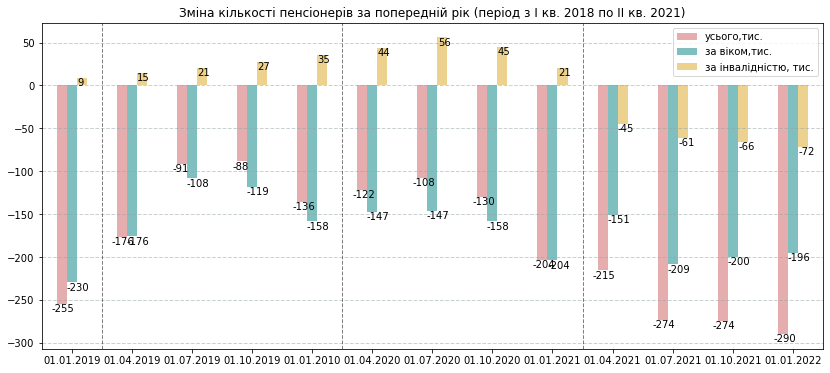

In [25]:
#plt.rcParams['figure.figsize'] = (12, 8)

data_plot = df_2018_2021[['year_difference_total', 'year_difference_by_age', 'year_difference_disability']]

n = data_plot.shape[0]
width = 0.3
labels = ['01.01.2019', '01.04.2019', '01.07.2019', '01.10.2019','01.01.2010','01.04.2020','01.07.2020', '01.10.2020','01.01.2021','01.04.2021', '01.07.2021', '01.10.2021', '01.01.2022']
X = np.arange(n)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 6));
    
data_plot.plot.bar(ax=ax1, legend=True, alpha=0.5, color=["indianred",'teal','goldenrod'])
ax1.legend(ax1, labels=['усього,тис.', 'за віком,тис.','за iнвалiднiстю, тис.'])

#fig, (linie1, linie2, linie3) = data_plot.plot.bar(legend = True)
#plt.xlim([-0.5, n-0.5])
ax1.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
# Text on the top of each barplot
for i in range(len(data_plot)):
    ax1.text(s = "{:.0f}".format(data_plot.year_difference_total[i]), x = X[i] - 1.1 * width, y = data_plot.year_difference_total[i] - 9, fontsize = 10)
    ax1.text(s = "{:.0f}".format(data_plot.year_difference_by_age[i]), x = X[i] - 0.3 * width, y = data_plot.year_difference_by_age[i] - 9, fontsize = 10)
    ax1.text(s = "{:.0f}".format(data_plot.year_difference_disability[i]), x = X[i] + 0.3 * width, y = data_plot.year_difference_disability[i] - 9, fontsize = 10)

ax1.title.set_text('Змiна кiлькостi пенсiонерiв за попереднiй рiк (перiод з I кв. 2018 по II кв. 2021)')
#plt.xlabel('рiк')
xposition = [0.5, 4.5, 8.5, 12.5]
for xc in xposition:
    ax1.axvline(x=xc, color='k', linestyle='--', linewidth=1, alpha=0.5)
#ax1.set_ylabel('тисяч')

#plt.legend(labels=['усього,тис.', 'за віком,тис.','за iнвалiднiстю, тис.'])
ax1.set_xticks(range(0, n))
ax1.set_xticklabels(labels, rotation=0);

plt.show()

/Users/jane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # This is added back by InteractiveShellApp.init_path()


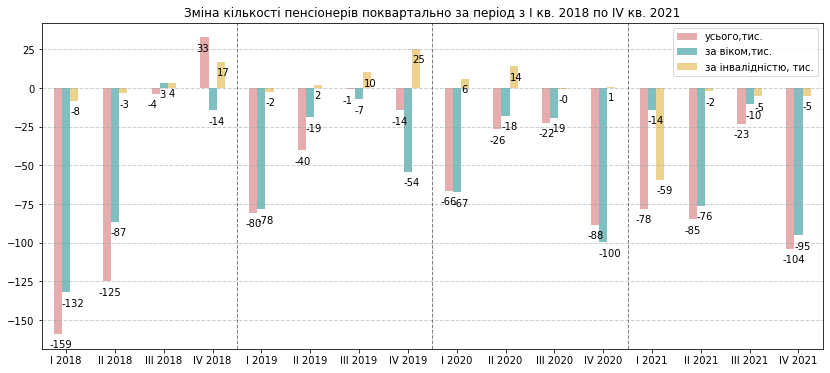

In [26]:
data_plot = df['2018':][['difference_total', 'difference_by_age', 'difference_disability']]

n = data_plot.shape[0]
width = 0.3
labels = ['I 2018', 'II 2018', 'III 2018','IV 2018','I 2019', 'II 2019', 'III 2019','IV 2019','I 2020','II 2020', 'III 2020','IV 2020','I 2021', 'II 2021', 'III 2021', 'IV 2021']
X = np.arange(n)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 6));
    
data_plot.plot.bar(ax=ax1, legend=True, alpha=0.5, color=["indianred",'teal','goldenrod'])
ax1.legend(ax1, labels=['усього,тис.', 'за віком,тис.','за iнвалiднiстю, тис.'])

ax1.set_xlim([-0.5, n-0.5])
ax1.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
# Text on the top of each barplot
for i in range(len(data_plot)):
    ax1.text(x = X[i] - 1.1 * width , y = data_plot.difference_total[i] - 9, s = "{:.0f}".format(data_plot.difference_total[i]), fontsize = 10)
    ax1.text(x = X[i] - 0.3 * width , y = data_plot.difference_by_age[i] - 9, s = "{:.0f}".format(data_plot.difference_by_age[i]), fontsize = 10)
    ax1.text(x = X[i] + 0.3 * width , y = data_plot.difference_disability[i] - 9, s = "{:.0f}".format(data_plot.difference_disability[i]), fontsize = 10)

ax1.title.set_text("Змiна кiлькостi пенсiонерiв поквартально за перiод з I кв. 2018 по IV кв. 2021")
xposition = [3.5, 7.5, 11.5]
for xc in xposition:
    ax1.axvline(x=xc, color='k', linestyle='--', linewidth=1, alpha=0.5)
#ax1.set_ylabel('тисяч')
ax1.set_xticks(range(0, n))
ax1.set_xticklabels(labels, rotation=0);


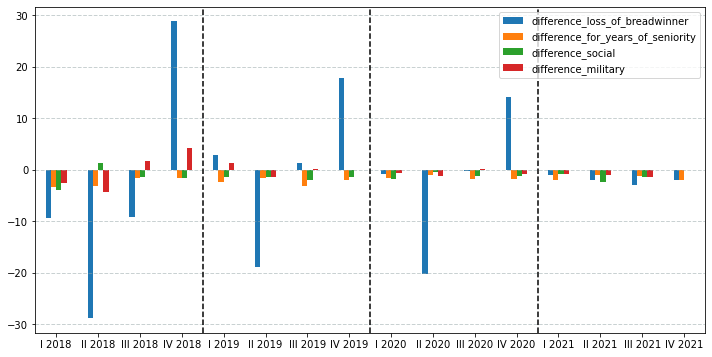

In [27]:
col=['difference_loss_of_breadwinner', 'difference_for_years_of_seniority',
     'difference_social', 'difference_military']
data_plot = df['2018':][col]
#data_plot = data_plot[1:]
width = 1/8
plt.rcParams['figure.figsize'] = (12, 6)
#plt.xlim([n, -0.25])
X = np.arange(n)
data_plot.plot.bar(legend = True)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5) #
plt.xticks(range(0, n), labels)
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--')
plt.xticks(range(0, n), labels, rotation=0)

plt.show()

/Users/jane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # This is added back by InteractiveShellApp.init_path()


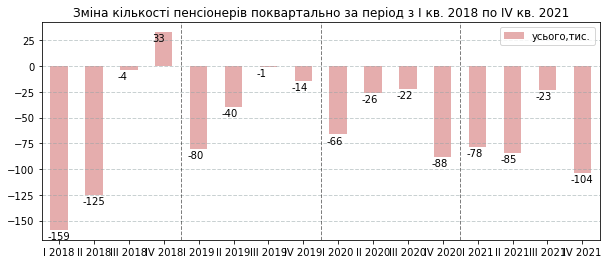

In [28]:
data_plot = df['2018':][['difference_total']]

n = data_plot.shape[0]
width = 0.3
labels = ['I 2018', 'II 2018', 'III 2018','IV 2018','I 2019', 'II 2019', 'III 2019','IV 2019','I 2020','II 2020', 'III 2020','IV 2020','I 2021', 'II 2021',  'III 2021', 'IV 2021']
X = np.arange(n)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 4));
    
data_plot.plot.bar(ax=ax1, legend=True, alpha=0.5, color=["indianred",'teal','goldenrod'])
ax1.legend(ax1, labels=['усього,тис.', 'за віком,тис.','за iнвалiднiстю, тис.'])

ax1.set_xlim([-0.5, n-0.5])
ax1.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
# Text on the top of each barplot
for i in range(len(data_plot)):
    ax1.text(x = X[i] - 1.1 * width , y = data_plot.difference_total[i] - 9, s = "{:.0f}".format(data_plot.difference_total[i]), fontsize = 10)
    
ax1.title.set_text("Змiна кiлькостi пенсiонерiв поквартально за перiод з I кв. 2018 по IV кв. 2021")
xposition = [3.5, 7.5, 11.5]
for xc in xposition:
    ax1.axvline(x=xc, color='k', linestyle='--', linewidth=1, alpha=0.5)
#ax1.set_ylabel('тисяч')
ax1.set_xticks(range(0, n))
ax1.set_xticklabels(labels, rotation=0);


In [29]:
q_2020_check = 336985+1289068+898525+2126086+4588898+1891392

In [30]:
print(q_2020_check/1000 == df['2021'].total[0])

True


In [31]:
df['2021':'2021'].total

2021-01    11130.954
2021-04    11052.849
2021-07    10968.143
2021-10    10945.145
Freq: M, Name: total, dtype: float64

In [32]:
q_2015_check = 12147189

In [33]:
print(q_2015_check/1000 == df['2015'].total[0])

False


In [34]:
df['2015']['total'][0]

12147.188999999998